In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import sqrt, pi
from scipy.stats import chi2
from scipy.stats import shapiro
import scipy.stats as stats

C:\Users\dgami\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Оглавление
* [Выгружаем данные](#chapter1)
    * [Выгружаем данные Apple за последние 3 года ](#section_1_1)
* [Анализ дохоностей](#chapter2)
    * [Логарифмическая доходность ](#section_2_1)
    * [Гистограмма доходностей ](#section_2_2)
    * [Делаем BoxPlot  ](#section_2_3)
        * [Изучаем данные BoxPlot подробнее](#sub_section_2_3_1)
* [Проверка нормальности](#chapter3)
    * [Тест на нормальность распеределения данных через критерий Пирсона ](#section_3_1)
    * [Проверка нормальности с помощью Шапиро-Уилка ](#section_3_2)
    * [QQ-plot ](#section_3_3)
    
    

<div style="
    background: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
    padding: 20px;
    border-radius: 10px;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
    border-left: 5px solid #007aff;
    margin: 15px 0;
">
    <h2 style="
        color: #2c3e50;
        margin-top: 0;
        font-family: 'Helvetica Neue', Arial, sans-serif;
        text-align: center;
    ">
        <i class="fa fa-apple" style="color: #007aff; margin-right: 10px;"></i>
        Цель проекта
    </h2>
    <p style="
        color: #34495e;
        font-size: 18px;
        line-height: 1.6;
        text-align: center;
        font-weight: 500;
    ">
        Анализ исторических доходностей Apple
    </p>
    <div style="
        display: flex;
        justify-content: space-around;
        margin-top: 15px;
    ">
        <span style="
            background-color: #e3f2fd;
            padding: 5px 10px;
            border-radius: 15px;
            color: #007aff;
            font-size: 14px;
        ">
            <i class="fa fa-line-chart"></i> Анализ данных
        </span>
        <span style="
            background-color: #e8f5e9;
            padding: 5px 10px;
            border-radius: 15px;
            color: #4caf50;
            font-size: 14px;
        ">
            <i class="fa fa-calendar"></i> Исторические данные
        </span>
        <span style="
            background-color: #f3e5f5;
            padding: 5px 10px;
            border-radius: 15px;
            color: #9c27b0;
            font-size: 14px;
        ">
            <i class="fa fa-apple"></i> Apple Inc.
        </span>
    </div>
</div>

# Выгружаем данные  <a id="chapter1"></a>

## Выгружаем данные Apple за последние 3 года <a id="section_1_1"></a>

In [2]:
# Get the data of the stock AAPL
data = yf.download('AAPL','2022-01-01','2025-06-30')
data.head()

<ipython-input-2-eba5d563e55d>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL','2022-01-01','2025-06-30')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.645645,179.499574,174.425140,174.542917,104487900
2022-01-04,176.378372,179.558489,175.809091,179.254221,99310400
2022-01-05,171.686722,176.839679,171.411899,176.290033,94537600
2022-01-06,168.820679,172.059683,168.467333,169.507737,96904000
2022-01-07,168.987564,170.921151,167.868637,169.694257,86709100


In [3]:
data.columns = data.columns.droplevel(1)

In [4]:
data = data[['Close']]

# Анализ дохоностей <a id="chapter2"></a>

## Логарифмическая доходность <a id="section_2_1"></a>

In [5]:
data['Returns'] = np.log(data['Close']) - np.log(data['Close'].shift(1))
data

Price,Close,Returns
Date,,
2022-01-03,178.645645,NaN
2022-01-04,176.378372,-0.012773
2022-01-05,171.686722,-0.026960
2022-01-06,168.820679,-0.016834
2022-01-07,168.987564,0.000988
...,...,...
2025-06-23,201.500000,0.002484
2025-06-24,200.300003,-0.005973
2025-06-25,201.559998,0.006271


## Гистограмма доходностей <a id="section_2_2"></a>

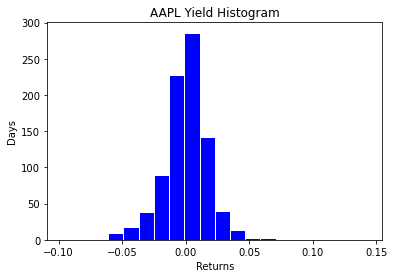

In [6]:
plt.hist(data['Returns'].dropna(), bins=20, color='blue', edgecolor='white')

plt.title('AAPL Yield Histogram')  
plt.xlabel('Returns')                 
plt.ylabel('Days')             

plt.show()

## Делаем BoxPlot <a id="section_2_3"></a>

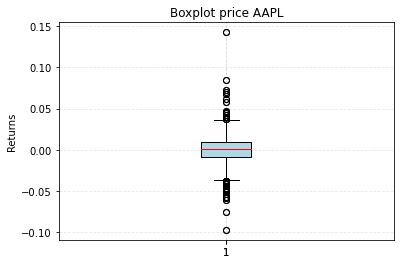

In [7]:
plt.boxplot(data['Returns'].dropna(),  
            vert=True,               
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'), 
            medianprops=dict(color='red')) 

boxplot = plt.boxplot(data['Returns'].dropna(),  
            vert=True,               
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'), 
            medianprops=dict(color='red')) 

plt.title('Boxplot price AAPL')
plt.ylabel('Returns')
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

### Изучаем данные BoxPlot подробнее <a id="sub_section_2_3_1"></a> 

In [8]:
q25 = data['Returns'].quantile(0.25)  
q75 = data['Returns'].quantile(0.75)  # 

print(f"25-й квартиль (Q1): {q25:.4f}")
print(f"75-й квартиль (Q3): {q75:.4f}")

25-й квартиль (Q1): -0.0089
75-й квартиль (Q3): 0.0097


In [9]:
lower_whisker = boxplot['whiskers'][0].get_ydata()[1]  
upper_whisker = boxplot['whiskers'][1].get_ydata()[1]  

print(f"Границы усов:")
print(f"• Нижний ус : {lower_whisker:.4f}")
print(f"• Верхний ус : {upper_whisker:.4f}")

Границы усов:
• Нижний ус : -0.0366
• Верхний ус : 0.0364


In [10]:
between_whiskers = data['Returns'].between(lower_whisker, upper_whisker, inclusive='both')
percentage = (between_whiskers.sum() / len(data['Returns'].dropna())) * 100

print(f"Процент значений между усами: {percentage:.1f}%")

Процент значений между усами: 94.7%


 По графику видно, что медиана находится около 0.<br>
 25% квартиль: -0.0089 (25% значений<br>
 75% квартиль: 0.0097<br>
 Нижний ус: -0.0366<br>
 Верхний ус: 0.0364<br>
 Размах: 0.073<br>
 Процент значений между усами: 94.7%

# Проверка нормальности <a id="chapter3"></a>

## Тест на нормальность распеределения данных через критерий Пирсона <a id="section_3_1"></a>


In [11]:
def testPirsonNormal(alpha, data):
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data, columns=["Values"]).dropna()
    if isinstance(data, pd.Series):
        data = data.to_frame()
        data.columns = ["Values"]

    n = len(data["Values"].dropna())  # размер выборки
    x = data["Values"].mean()  # среднее выборочное
    std = data["Values"].std()

    def phi(z):
        """
        Вычисляет Φ(z) - интеграл от 0 до z стандартного
        нормального распределения.
        """

        def integrand(z):
            return np.exp(-(z**2) / 2)

        integral, _ = quad(integrand, 0, z)
        return (1 / sqrt(2 * pi)) * integral

    def interval_probability(a, b, mean, std):
        """P(a < X < b) = Φ((b-μ)/σ) - Φ((a-μ)/σ)"""
        return (phi((b - x) / std) - phi((a - x) / std)) * n

    returns = data["Values"].dropna().values

    num_bins = 7
    bin_edges = np.linspace(returns.min(), returns.max(), num_bins + 1)

    probs = [
        interval_probability(bin_edges[i], bin_edges[i + 1], x, std)
        for i in range(num_bins)
    ]

    result_df = pd.DataFrame(
        {
            "Интервал": [
                f"{bin_edges[i]:.6f} — {bin_edges[i+1]:.6f}"
                for i in range(num_bins)
            ],
            "Количество": np.histogram(returns, bins=bin_edges)[0],
            "np_i": probs,
        }
    )
    result_df["chi_squared"] = (
        (result_df["np_i"] - result_df["Количество"]) ** 2
    ) / result_df["np_i"]
    chi_squared_obs = result_df["chi_squared"].sum()
    alpha = alpha
    df = num_bins - 3  # степени свободы (m - 3, где m - число интервалов)

    chi_squared_critical = chi2.ppf(1 - alpha, df)

    if chi_squared_obs <= chi_squared_critical:
        conclusion = (
            f"χ²_набл ({chi_squared_obs:.2f}) ≤ χ²_крит "
            f"({chi_squared_critical:.2f}) => "
            "Нет оснований отвергнуть H₀ (данные"
            "соответствуют нормальному распределению)"
        )
    else:
        conclusion = (
            f"χ²_набл ({chi_squared_obs:.2f}) > "
            f"χ²_крит ({chi_squared_critical:.2f}) => "
            "Отвергаем H₀ (данные не соответствуют нормальному распределению)"
        )

    print(f"Уровень значимости: α = {alpha}")
    print(f"Степени свободы: df = {df}")
    print(f"Критическое значение χ²: {chi_squared_critical:.2f}")
    print(f"Наблюдаемое значение χ²: {chi_squared_obs:.2f}")
    print("\nСтатистическое заключение:")
    print(conclusion)
    
    
alpha = 0.05
testPirsonNormal(alpha, data["Returns"])

Уровень значимости: α = 0.05
Степени свободы: df = 4
Критическое значение χ²: 9.49
Наблюдаемое значение χ²: 510954.81

Статистическое заключение:
χ²_набл (510954.81) > χ²_крит (9.49) => Отвергаем H₀ (данные не соответствуют нормальному распределению)


## Проверка нормальности с помощью Шапиро-Уилка <a id="section_3_2"></a>

In [12]:
returns_2 = data['Returns'].dropna().values

shapiro_test = shapiro(returns_2)

alpha = 0.05
if shapiro_test.pvalue > alpha:
    conclusion = (f"p-value = {shapiro_test.pvalue:.4f} > α = {alpha} ⇒ "
                 "Нет оснований отвергнуть H₀ (данные распределены нормально)")
else:
    conclusion = (f"p-value = {shapiro_test.pvalue:.4f} ≤ α = {alpha} ⇒ "
                 "Отвергаем H₀ (данные не распределены нормально)")

print("=== Критерий Шапиро-Уилка ===")
print(f"Количество наблюдений: {len(returns_2)}")
print(f"W-статистика: {shapiro_test.statistic:.4f}")
print(f"p-value: {shapiro_test.pvalue:.4f}")
print("\nСтатистическое заключение:")
print(conclusion)

=== Критерий Шапиро-Уилка ===
Количество наблюдений: 873
W-статистика: 0.9428
p-value: 0.0000

Статистическое заключение:
p-value = 0.0000 ≤ α = 0.05 ⇒ Отвергаем H₀ (данные не распределены нормально)


## QQ-plot <a id="section_3_3"></a>

Text(0.5, 1.0, 'Q-Q график: нормальное распределение')

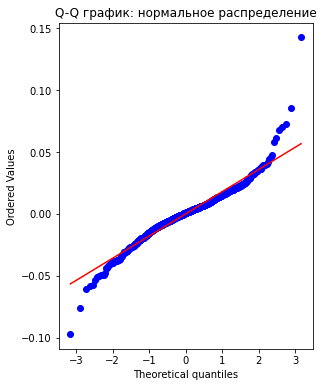

In [13]:
returns_value_qq = data[['Returns']].dropna().to_numpy()

returns_value_qq_2 = np.reshape(returns_value_qq, (873,))

returns_value_qq_2
# Q-Q график
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
stats.probplot(returns_value_qq_2, plot=plt)
plt.title('Q-Q график: нормальное распределение')
